In [2]:
import torch
from torch import nn

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X,Y = make_classification(n_features=2,n_redundant = 0 , n_informative = 1,
                            n_clusters_per_class = 1)

-4.4


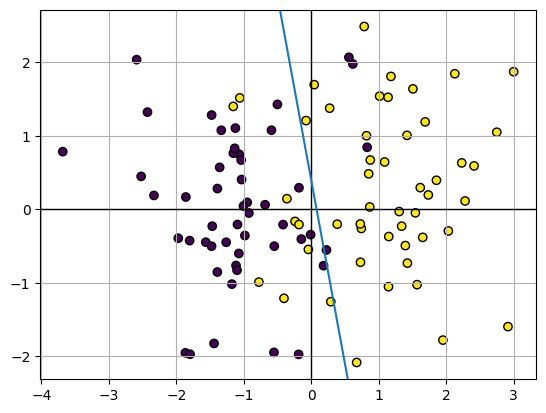

In [4]:
def plotmodel(w1,w2,b):
  x = np.linspace(-2,4,50)
  y = (-w1*x -b)/w2

  plt.scatter(X[:, 0], X[:, 1 ] , marker = 'o', c=Y,
         edgecolor = 'k')

  xmin , xmax = plt.gca().get_xlim()
  ymin , ymax = plt.gca().get_ylim()

  plt.axvline(0,-1,1, color = 'k' , linewidth=1)
  plt.axhline(0,-2,4, color = 'k' , linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)


w1 = 5
w2 = 1
b=-0.4
plotmodel(w1,w2,b)

p=(-1,1)
print(w1*p[0] + w2*p[1] + b)

In [5]:
perceptron = nn.Linear(2,1)
sigmoide = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.tensor([[5,1]], dtype=torch.float32))
perceptron.bias = nn.Parameter(torch.tensor([-0.4] ))

print('')

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[0.5016, 0.5070]])
tensor([0.7070])

tensor([[5., 1.]])
tensor([-0.4000])


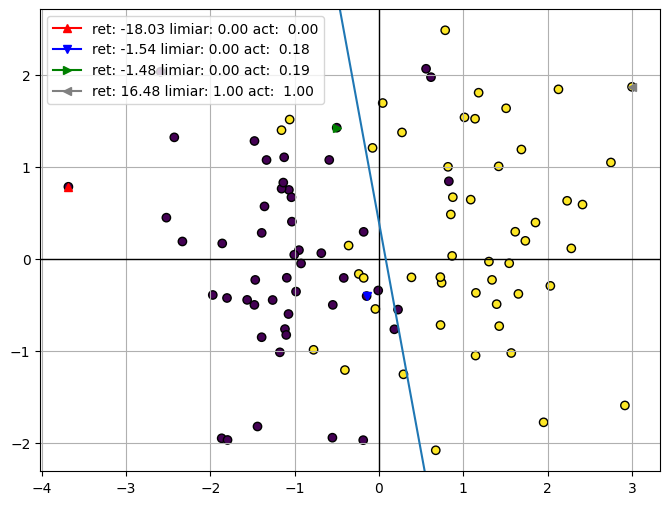

In [14]:
from matplotlib import colors
markers = ['^','v','>','<']
colors = ['r','b','g','gray']

plt.figure(figsize=(8,6))

plotmodel(w1,w2,b)

for k , idx in enumerate([17,21,43,66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0],x[1],marker = markers[k], color=colors[k], label=label)

plt.legend()
plt.show()